In [93]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

import datetime as dt
import time

In [94]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id')

In [95]:
# nos quedamos con las columnas que nos interesan
df = df[['titulo', 'descripcion', 'fecha', 'precio']]
df.head().sort_values(by = ['fecha'], ascending = False)

,titulo,descripcion,fecha,precio
id,,,,
185997,paseos del sol,bonito departamento en excelentes condiciones ...,2016-06-07 00:00:00,1150000.0
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,2015-10-17 00:00:00,1200000.0
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",2015-08-23 00:00:00,2273000.0
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",2013-06-28 00:00:00,3600000.0
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,2012-03-09 00:00:00,650000.0


In [96]:
df.isnull().any()

titulo          True
descripcion     True
fecha          False
precio         False
dtype: bool

In [106]:
df_fecha = df['fecha'].value_counts()
df_fecha

2016-12-03 00:00:00    1416
2016-04-08 00:00:00    1337
2016-12-28 00:00:00    1182
2012-08-17 00:00:00    1168
2016-12-27 00:00:00    1167
                       ... 
2012-12-24 00:00:00      11
2013-02-10 00:00:00       9
2012-12-30 00:00:00       5
2014-09-30 18:12:16       2
2014-08-31 18:12:16       1
Name: fecha, Length: 1830, dtype: int64

In [97]:
fecha = df.fecha.apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [98]:
df['fecha'] = fecha

In [103]:
año = df.fecha.apply(lambda x: x.year)
df['año'] = año
hora = df.fecha.apply(lambda x: x.hour)
df['hora'] = hora

In [104]:
hora.value_counts().head()

0     239986
11        11
18         3
Name: fecha, dtype: int64

In [100]:
df.head()

,titulo,descripcion,fecha,precio,año,hora
id,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",2015-08-23,2273000.0,2015,0
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",2013-06-28,3600000.0,2013,0
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,2015-10-17,1200000.0,2015,0
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,2012-03-09,650000.0,2012,0
185997,paseos del sol,bonito departamento en excelentes condiciones ...,2016-06-07,1150000.0,2016,0


In [101]:
año.value_counts().head()

2016    94038
2015    51470
2014    40572
2013    30386
2012    23534
Name: fecha, dtype: int64

Text(0, 0.5, 'Año')

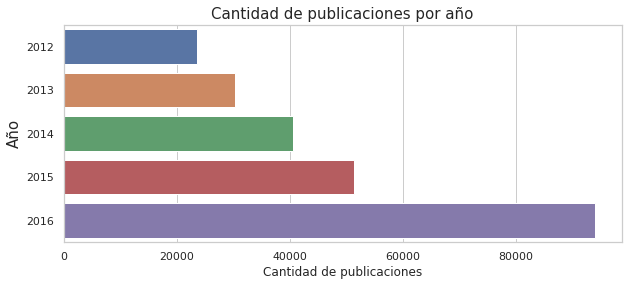

In [102]:
plt.figure(figsize=(10, 4))
gr = sns.barplot(x=df.año.value_counts().values , y=df.año.value_counts().index ,  orient='h')
gr.set_title("Cantidad de publicaciones por año", fontsize=15)
gr.set_xlabel("Cantidad de publicaciones", fontsize=12)
gr.set_ylabel("Año", fontsize=15)